# Import Libraries

In [1]:
import networkx as nx
import numpy as np
import pylab as pl
import scipy as sp
import time
import random
import queue
import pandas as pd
from IPython.display import display
from matplotlib import pyplot as plt
%matplotlib inline

# Read network from text file

+ Location of data for draw graph

In [2]:
data_loc=r'C:\Users\pc\Desktop\old desk\Documents\Data 620\Assignment2\\'
graph_file=data_loc+'com-amazon.ungraph.txt'
com_file=data_loc+'com-amazon.all.dedup.cmty.txt'
top_com_file=data_loc+'com-amazon.top5000.cmty.txt'

+ Load graph from text files

In [3]:
g = nx.read_edgelist(graph_file)

+ Analysis graph

In [4]:
# find number of nodes and edges 
N,K=g.order(),g.size()
avg_deg=K/N
# Display number of nodes and edges
print('Number of nodes of the graph: ',N)
print('Number of edges of the graph: ',K)
print('Average degree : ',avg_deg)

Number of nodes of the graph:  334863
Number of edges of the graph:  925872
Average degree :  2.7649277465709856


In [5]:
# Density of graph
density=nx.density(g)
print('Network density: ',density)

Network density:  1.6513834036534368e-05


In [6]:
# finding triadic closure
triadic_closure = nx.transitivity(g)
print("Triadic closure:", triadic_closure)

Triadic closure: 0.20522444916452579


In [7]:
# degree of graph
degree_dict = dict(g.degree(g.nodes()))
nx.set_node_attributes(g, degree_dict, 'degree')
degrees_vals = sorted(degree_dict.items(),reverse=True)
print("Top 20 nodes by degree:")
for d in degrees_vals[:20]:
    print(d)
# plot histogram

Top 20 nodes by degree:
('99999', 4)
('99998', 4)
('99996', 2)
('99995', 6)
('99992', 3)
('99991', 17)
('99990', 2)
('9999', 3)
('99989', 4)
('99988', 2)
('99987', 7)
('99985', 3)
('99983', 7)
('99982', 4)
('99981', 5)
('99980', 7)
('99979', 25)
('99976', 4)
('99974', 1)
('99973', 4)


In [8]:
# Clustering coefficient
clust_coefficients = nx.clustering(g)
print(type(clust_coefficients))
avg_clust = sum(clust_coefficients.values()) / len(clust_coefficients)
print(avg_clust)

<class 'dict'>
0.3967463932787655


In [9]:
# function for get subgraph
def get_subgraph_bfs(graph, start_node, num_node):
    node_set = set()
    probbed = {start_node}
    bfs_queue = queue.deque()
    bfs_queue.append(start_node)
    while len(bfs_queue) > 0:
        i = bfs_queue.popleft()
        node_set.add(i)
        for j in g[i]:
            if j not in probbed:
                probbed.add(j)
                bfs_queue.append(j)
        if len(node_set) >= num_node:
            return nx.subgraph(graph, node_set)

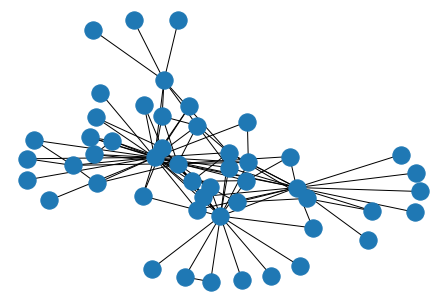

In [10]:
# get subgraph with 50 nodes
subgraph = get_subgraph_bfs(g, '1', 50)
# draw subgraph

nx.draw(subgraph)
plt.savefig("subgraph.png")

In [11]:
# get diameter of subpgraph
d=nx.diameter(subgraph)
print('Diameter of the subgraph: ',d)

Diameter of the subgraph:  4


+ Graph label extraction

In [12]:
# Open file and read each line in file
top5k = open(top_com_file, 'r')
for _ in range(5):
    print(repr(top5k.readline()))

'164985\t225214\t232761\n'
'105089\t282815\t331787\n'
'167906\t288975\t421279\t442612\t451312\n'
'69880\t231953\t518997\t523128\n'
'135499\t160294\t304770\n'


In [13]:
# read communities data from file
top5k.seek(0)
communities_dict = {}
i = 0
for line in top5k.readlines():
    data = [int(i) for i in line.split()]
    communities_dict[i] = data
    i += 1
top_index = sorted(communities_dict.keys(), 
                   key=lambda x: len(communities_dict[x]), 
                   reverse=True)

5000 5000


<ipython-input-14-4b102f2e94cb>:10: DeprecationWarning: scipy.linspace is deprecated and will be removed in SciPy 2.0.0, use numpy.linspace instead
  num_comm = sp.linspace(start=1, stop=5000, num=5000, dtype=int)


Text(0.5, 1.0, 'Community coverage')

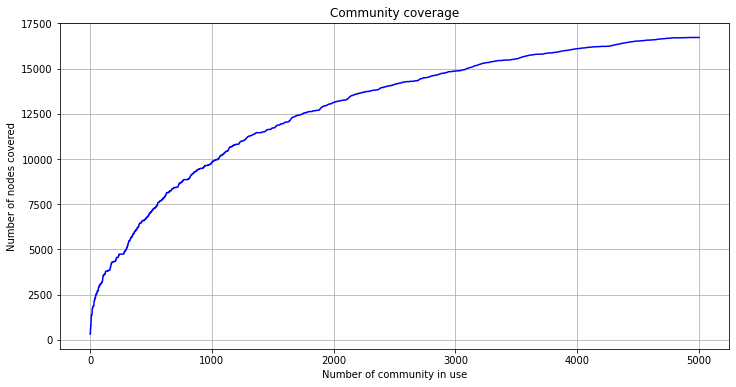

In [14]:
# Coverage for communites in the graph
# coverage[0] = number of nodes that community_0 covers
# coverage[1] = number of nodes that community_0 and community_1 covers
dummy_set = set()
coverage = []
for i in top_index:
    for nodeid in communities_dict[i]:
        dummy_set.add(nodeid)
    coverage.append(len(dummy_set))
num_comm = sp.linspace(start=1, stop=5000, num=5000, dtype=int)

print(len(num_comm), len(coverage))

# Plot the coverage against the number of community in use
plt.figure(figsize=(12,6))
plt.grid(True)
plt.plot(num_comm, coverage, 'b-')
plt.xlabel('Number of community in use')
plt.ylabel('Number of nodes covered')
plt.title('Community coverage')

+ Export graph to Gephi file to visualize graph



In [16]:
nx.write_gexf(g, 'network.gexf')